<a href="https://colab.research.google.com/github/fragenabhishek/ML/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
#import data from ics 
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','signle_epithelial_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitosin','class']
df=pd.read_csv(url,names=names)

print(df.axes)

df.replace('?',-99999,inplace=True)

df.drop(['id'],1,inplace=True)

print(df.shape)



[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitosin', 'class'],
      dtype='object')]
(699, 10)


In [ ]:
#dataset visulization

print(df.loc[698])

clump_thickness            4
uniform_cell_size          8
uniform_cell_shape         8
marginal_adhesion          5
signle_epithelial_size     4
bare_nuclei                5
bland_chromatin           10
normal_nucleoli            4
mitosin                    1
class                      4
Name: 698, dtype: object


In [ ]:
print(df.describe())

       clump_thickness  uniform_cell_size  ...     mitosin       class
count       699.000000         699.000000  ...  699.000000  699.000000
mean          4.417740           3.134478  ...    1.589413    2.689557
std           2.815741           3.051459  ...    1.715078    0.951273
min           1.000000           1.000000  ...    1.000000    2.000000
25%           2.000000           1.000000  ...    1.000000    2.000000
50%           4.000000           1.000000  ...    1.000000    2.000000
75%           6.000000           5.000000  ...    1.000000    4.000000
max          10.000000          10.000000  ...   10.000000    4.000000

[8 rows x 9 columns]


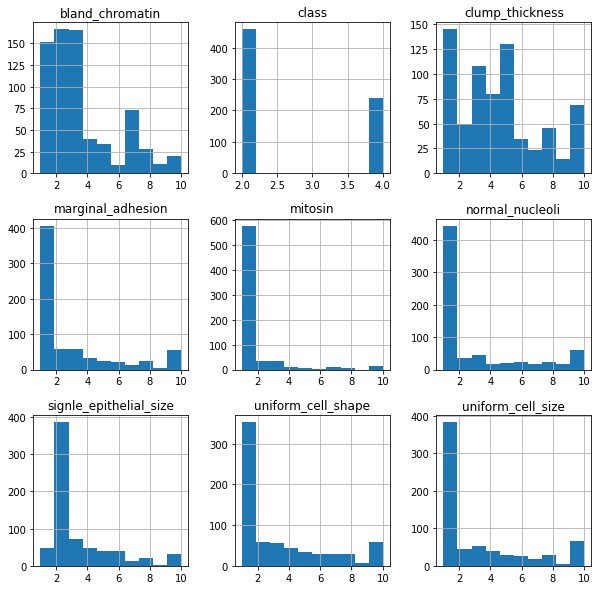

In [ ]:
#histogram
df.hist(figsize=(10,10))
plt.show()

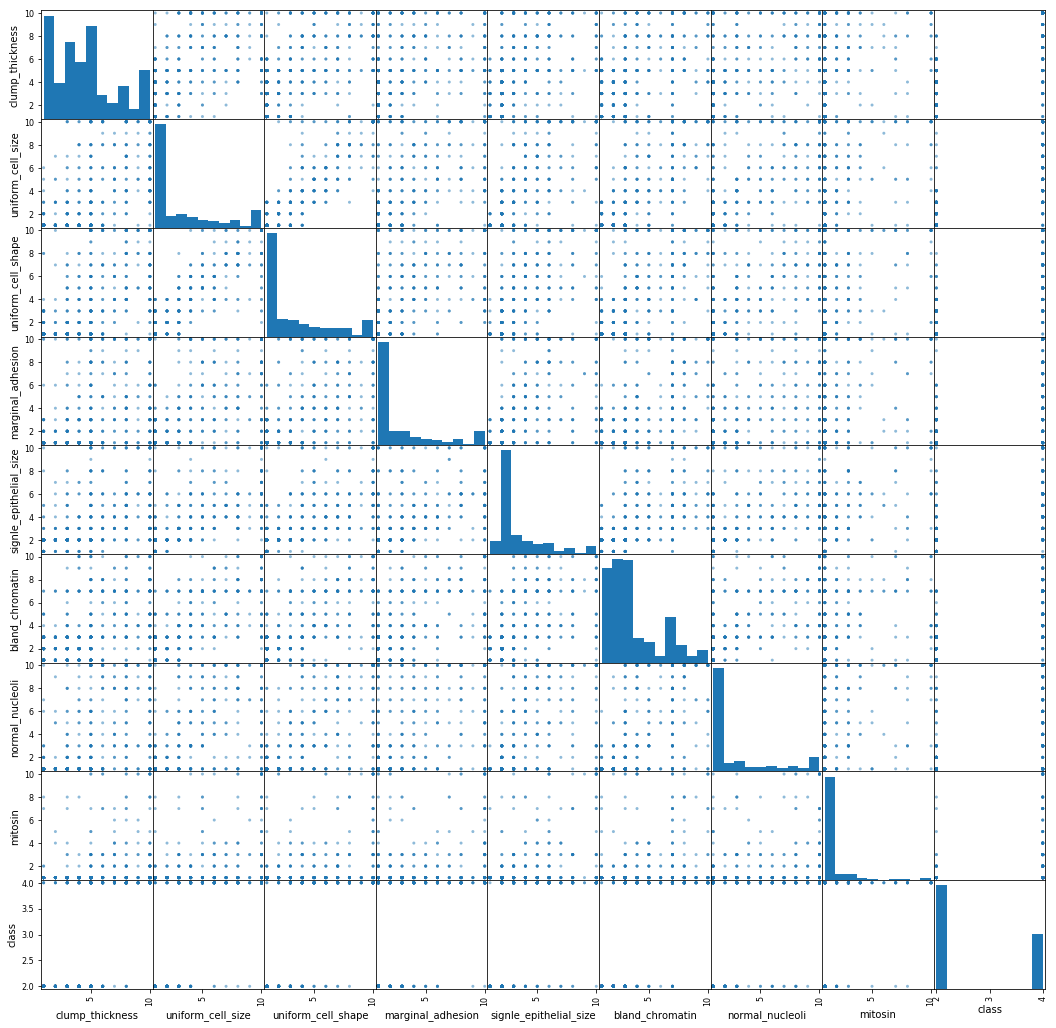

In [ ]:
#create scatter plot matrix
scatter_matrix(df,figsize=(18,18))
plt.show()

In [ ]:
# x and y datasets for training
X=np.array(df.drop(['class'],1))
y=np.array(df['class'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22)


In [ ]:
#specify testing option
seed=8
scoring='accuracy'

In [ ]:
#define the model to train
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))




In [ ]:
#evaluating each model
result=[]
names=[]

for name,model in models:
  Kfold=model_selection.KFold(n_splits=10,random_state=seed)
  cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=Kfold,scoring=scoring)
  names.append(name)
  msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
  print (msg)
  

KNN:0.968788(0.011735)
SVM:0.963333(0.025835)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [ ]:
#make predictions
for name,model in models:
  model.fit(X_train,y_train)
  predictions=model.predict(X_test)
  print(name)
  print(accuracy_score(y_test,predictions))
  print(classification_report(y_test,predictions))

KNN
0.9675324675324676
              precision    recall  f1-score   support

           2       0.98      0.97      0.98       103
           4       0.94      0.96      0.95        51

    accuracy                           0.97       154
   macro avg       0.96      0.97      0.96       154
weighted avg       0.97      0.97      0.97       154

SVM
0.961038961038961
              precision    recall  f1-score   support

           2       0.99      0.95      0.97       103
           4       0.91      0.98      0.94        51

    accuracy                           0.96       154
   macro avg       0.95      0.97      0.96       154
weighted avg       0.96      0.96      0.96       154



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
clf=SVC()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)
example=np.array([(4,2,1,1,1,2,3,2,5)])
example=example.reshape(len(example),-1)
prediction=clf.predict(example)
print(prediction)

0.961038961038961
[4]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
